# Activity: work with the iris dataset

Marisol Rodríguez Mejía | A01640086


In [123]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# url string that hosts our .csv file
url = Ruta + "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dfprev = pd.read_csv(url, header=None, names=["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])

df = dfprev.copy()
df = df.drop(["Type"], axis=1)

**1. Do clustering with the iris flower dataset to form clusters using as features the four features**

<function matplotlib.pyplot.show(close=None, block=None)>

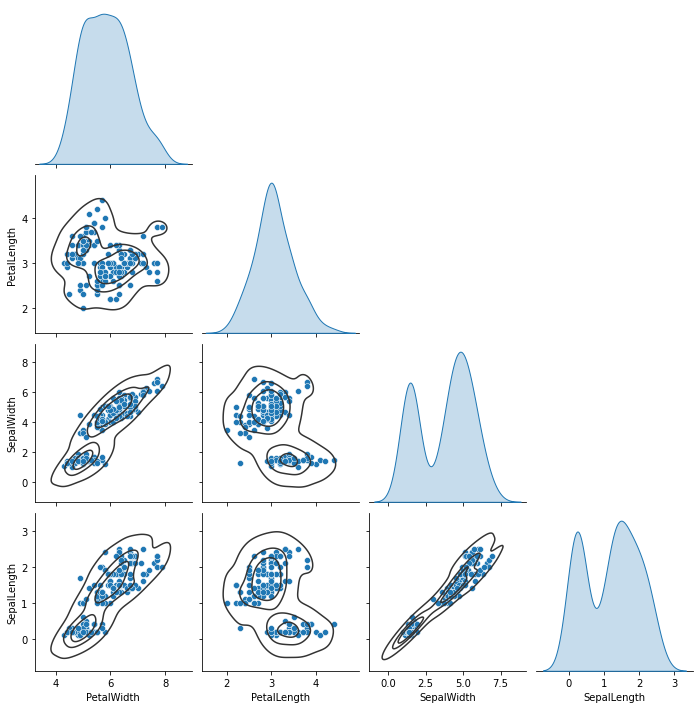

In [126]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show

In [127]:
# Define number of clusters
K = 3 # For each measurement
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

df['yestimated'] = yestimated
df.yestimated.unique()

array([0, 1, 2], dtype=int32)

In [128]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
  # Create model
  km = KMeans(n_clusters=k, n_init="auto")
  # Do K-means clustering
  km.fit_predict(df[['PetalWidth', 'PetalLength', 'SepalWidth', 'SepalLength']])
  # Save sse for each k
  sse.append(km.inertia_)

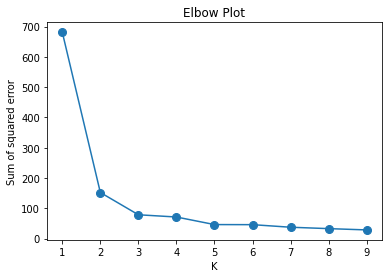

In [129]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

**2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features**

In [130]:
df = dfprev.copy()
df = df.drop(["SepalWidth", "SepalLength", "Type"], axis=1)
df.head(2)

,PetalWidth,PetalLength
0,5.1,3.5
1,4.9,3.0


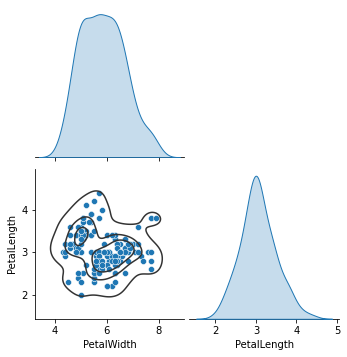

In [131]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [132]:
# Define number of clusters
K = 3 # For each measurement
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df[['PetalWidth', 'PetalLength']])

# Print estimated cluster of each point in the dataset
yestimated

df['yestimated'] = yestimated
df.yestimated.unique()

array([2, 1, 0], dtype=int32)

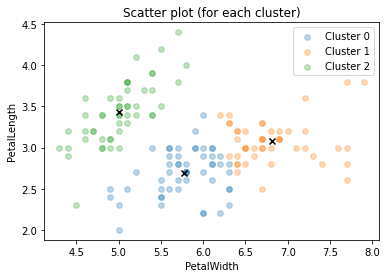

In [133]:
# Get a dataframe with the data of each cluster
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.PetalWidth, df1.PetalLength, label='Cluster 0', marker='o', s=32, alpha=0.3)
plt.scatter(df2.PetalWidth, df2.PetalLength, label='Cluster 1', marker='o', s=32, alpha=0.3)
plt.scatter(df3.PetalWidth, df3.PetalLength, label='Cluster 2', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='x')

plt.title('Scatter plot (for each cluster)')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

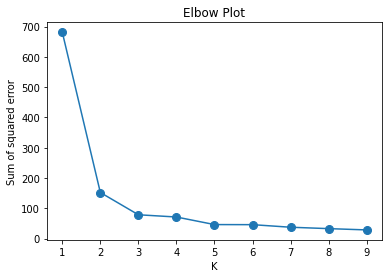

In [134]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

**3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features**

In [135]:
df = dfprev.copy()
df = df.drop(["PetalWidth", "PetalLength", "Type"], axis=1)
df.head(2)

,SepalWidth,SepalLength
0,1.4,0.2
1,1.4,0.2


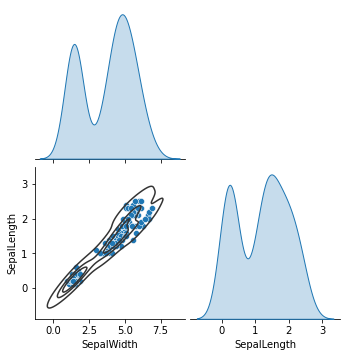

In [136]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [137]:
# Define number of clusters
K = 3 # For each measurement
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df[['SepalWidth', 'SepalLength']])

# Print estimated cluster of each point in the dataset
yestimated

df['yestimated'] = yestimated
df.yestimated.unique()

array([0, 2, 1], dtype=int32)

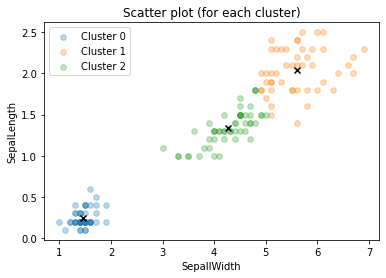

In [138]:
# Get a dataframe with the data of each cluster
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.SepalWidth, df1.SepalLength, label='Cluster 0', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalWidth, df2.SepalLength, label='Cluster 1', marker='o', s=32, alpha=0.3)
plt.scatter(df3.SepalWidth, df3.SepalLength, label='Cluster 2', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='x')

plt.title('Scatter plot (for each cluster)')
plt.xlabel('SepallWidth')
plt.ylabel('SepalLength')
plt.legend()
plt.show()

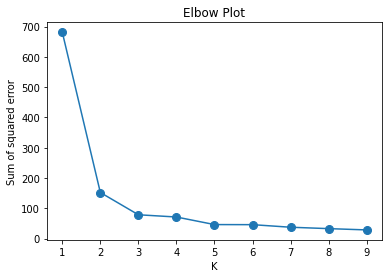

In [139]:
# Plot sse versus k
plt.plot(k_rng, sse, 'o-', markersize=8)

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()